# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data,index=labels)
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
print(pd.DataFrame.describe(df))
print(pd.DataFrame.info(df))

            age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
print(df.head(3))
df.iloc[:,1]

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2


a      cat
b      cat
c    snake
d      dog
e      dog
f      cat
g    snake
h      cat
i      dog
j      dog
Name: animal, dtype: object

```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```





In [0]:
df.loc[['c','d','h'],['animal','age']]

,animal,age
c,snake,0.5
d,dog,NaN
h,cat,NaN


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df[df['visits']>3]

,age,animal,priority,visits


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
df.loc[pd.isnull(df['age'])]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
df.loc[(df['animal']=="cat") & (df['age']<3)]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df.loc[(df['age']<4)&(df['age']>2)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [0]:
df.at['f','age'] =1.5
df


,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
df['visits'].sum()
np.sum(df['visits'])

19

```Calculate the mean age for each different animal in `df`.```

In [0]:
df.groupby("animal").mean()

,age,visits
animal,,
cat,2.333333,2.0
dog,5.000000,2.0
snake,2.500000,1.5


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
k = pd.DataFrame([(45,'lion','high',4)], columns = ['age' , 'animal', 'priority' , 'visits'], index=['k']) 
df = df.append(k)
df = df.drop("k")

```Count the number of each type of animal in `df`.```

In [0]:
df.groupby("animal").size()

animal
cat      4
dog      4
snake    2
dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
df.sort_values(by=['age'])
df.sort_values(by=['visits'], ascending = True)

,age,animal,priority,visits
a,2.5,cat,yes,1
g,4.5,snake,no,1
h,NaN,cat,yes,1
j,3.0,dog,no,1
c,0.5,snake,no,2
e,5.0,dog,no,2
i,7.0,dog,no,2
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,1.5,cat,no,3


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
df = df.replace("yes",True)
df = df.replace("no",False)
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,snake,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,snake,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
df = df.replace('snake','python')
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,python,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,python,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
pd.pivot_table(df,index=['animal'])

,age,priority,visits
animal,,,
cat,2.333333,0.75,2.0
dog,5.000000,0.25,2.0
python,2.500000,0.00,1.5


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
data = {'age':np.random.randint(low=20, high=65, size=1000),'skill':np.random.normal(loc=0.5,scale=0.3,size=1000),'height':np.around(np.random.uniform(low=1.5,high=2.0,size=1000),decimals=2)}
df = pd.DataFrame(data)



```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
df["salary"]=1000*((df["age"]**2))/1000 + 1.7*df["skill"]+0.4*np.exp(-(df["height"]-1.7)**2)
df

,age,height,skill,salary
0,45,1.61,0.608185,2026.430687
1,38,1.74,0.578404,1445.382647
2,55,1.85,0.740362,3026.649716
3,54,1.53,0.422284,2917.106488
4,41,1.82,0.696433,1682.578217
5,50,1.85,0.183577,2500.703181
6,31,1.95,0.147161,961.625938
7,42,1.82,0.540173,1765.312576
8,24,1.99,0.146553,576.616876
9,57,1.59,0.552711,3250.334798


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
g = df.groupby(by = df["age"]//10%10)
f = df.groupby(by = df["age"])
n_rows_g = g.agg("count").shape[0]
mean_g = g["salary"].mean()
max_height_g = g["height"].agg("max")
print(n_rows_g)
print(mean_g)
print(max_height_g)


5
age
2     609.000703
3    1208.792865
4    2015.186729
5    2970.085058
6    3837.186019
Name: salary, dtype: float64
age
2    2.00
3    1.99
4    2.00
5    2.00
6    1.99
Name: height, dtype: float64


```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
f = df.groupby(by = df["age"])
print(f["salary"].mean()/f["height"].sum())

age
20      9.716987
21     14.332750
22     13.847595
23     11.053624
24     14.028324
25     27.087998
26     15.654991
27     18.563385
28     28.431954
29     26.439406
30     20.665036
31     21.542378
32     31.608434
33     27.076689
34     29.057365
35     37.806895
36     29.311362
37     31.518353
38     46.364812
39     23.981251
40     35.587476
41     45.267136
42     48.583542
43     45.125284
44     38.667718
45     48.841248
46     40.503815
47     56.575079
48     46.361499
49     71.949077
50     72.585778
51     45.169387
52     73.491510
53     69.440779
54     86.027285
55     70.278854
56    145.784249
57     93.665857
58    150.435137
59    101.022233
60     82.444221
61    121.995601
62     87.751220
63    118.587098
64    115.546109
dtype: float64


```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

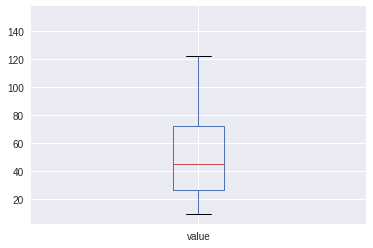

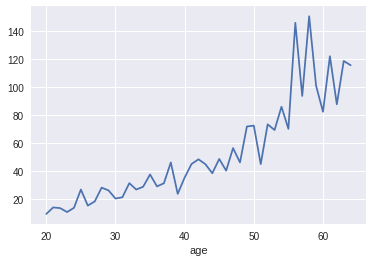

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
a=pd.Series(f["salary"].mean()/f["height"].sum(),name='value')
a.reset_index().boxplot('value')
plt.show()
a.plot()
plt.show()

```Save the result as a csv```

In [0]:
(f["salary"].mean()/f["height"].sum()).to_csv(r"C:\Users\T8698819\Desktop\limonana\ex.csv")

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [6]:
df[df["YearBuilt"]== df["YearBuilt"].min()]


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1349,1350,70,50.0,5250,8,5,1872,1987,0.0,259,...,0,54,20,0,0,0,0,12,2008,122000


In [0]:
df[df["YearBuilt"]== df["YearBuilt"].min()]["SalePrice"].max()


122000

In [0]:
df["LotArea"].mean()


10516.828082191782

In [0]:
df["LotArea"].quantile(0.5)


9478.5

In [0]:
df.groupby("Fireplaces").size()[0]>df.groupby("Fireplaces").size()[1:].sum()


False

In [0]:
df[df["PoolArea"]>0]["SalePrice"].mean()


288138.5714285714

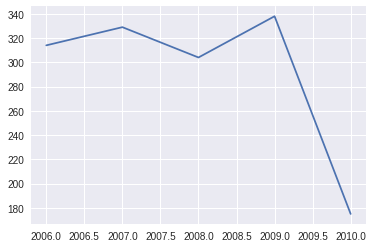

(array([  1.,   5.,  25.,  57.,   0., 821., 252., 205.,  72.,  22.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

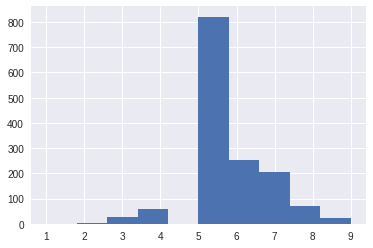

In [0]:
plt.plot(df.groupby("YrSold").size())
plt.show()
plt.hist(df["OverallCond"])

In [0]:
g = df.groupby("Fireplaces")
print(g["SalePrice"].mean())
print(2019 - g["YearBuilt"].mean())
g["FullBath"].nunique()

Fireplaces
0    141331.482609
1    211843.909231
2    240588.539130
3    252000.000000
Name: SalePrice, dtype: float64
Fireplaces
0    54.781159
1    39.150769
2    54.347826
3    38.400000
Name: YearBuilt, dtype: float64


Fireplaces
0    4
1    4
2    4
3    2
Name: FullBath, dtype: int64

In [0]:
c=df[df["MSSubClass"]>60].groupby(lambda x: df['MSSubClass'].loc[x]%20==0)
print(c.agg({'OverallQual': 'std'}))
print(c.agg({'OverallQual': 'mean'}))
print(c.agg({'OverallQual': 'max'}))
c.agg({'OverallQual': 'min'})

       OverallQual
False     1.193055
True      1.111021
       OverallQual
False     5.556180
True      6.389908
       OverallQual
False           10
True             9


,OverallQual
False,3
True,4


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df["LotArea in squared meters"]=df["LotArea"]*0.092903
df["1stFlrSF + 2ndFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
df["GarageArea**0.5"] = df["GarageArea"]**0.5
df["LotArea / (BedroomAbvGr+1)"] = df["LotArea"] / (df["BedroomAbvGr"]+1)
a = pd.merge((df.groupby("YearBuilt").mean()["LotArea"] + 1e-5).reset_index(),df,on="YearBuilt")

df["LotArea / mean"] = a["LotArea_y"]/a["LotArea_x"]
df["rank"] = df["LotArea"].rank()
df[pd.get_dummies(df["LotConfig"]).columns] = pd.get_dummies(df["LotConfig"])
a


,YearBuilt,LotArea_x,Id,MSSubClass,LotFrontage,LotArea_y,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,...,1stFlrSF + 2ndFlrSF,GarageArea**0.5,LotArea / (BedroomAbvGr+1),LotArea / mean,rank,Corner,CulDSac,FR2,FR3,Inside
0,1872,5250.000010,1350,70,50.0,5250,8,5,1987,0.0,...,2153,0.000000,1050.000000,2.235727,155.0,0,0,0,0,1
1,1875,6342.000010,1138,50,54.0,6342,5,8,1996,0.0,...,1020,0.000000,2114.000000,1.254283,241.0,0,0,0,0,1
2,1880,12246.500010,305,75,87.0,18386,7,9,2002,0.0,...,3493,29.495762,4596.500000,0.848999,1399.0,0,0,0,0,1
3,1880,12246.500010,631,70,50.0,9000,5,6,1991,0.0,...,1750,15.491933,2250.000000,1.006419,631.5,1,0,0,0,0
4,1880,12246.500010,748,70,65.0,11700,7,7,2003,0.0,...,2640,29.393877,2340.000000,1.031203,1108.5,1,0,0,0,0
5,1880,12246.500010,1133,70,90.0,9900,6,4,1950,0.0,...,2210,14.317821,1650.000000,0.815890,820.5,0,0,0,0,1
6,1882,17671.000010,992,70,121.0,17671,8,9,1986,0.0,...,1742,20.591260,3534.200000,1.231398,1393.0,1,0,0,0,0
7,1885,11070.000010,107,30,60.0,10800,4,7,1995,0.0,...,1047,16.522712,3600.000000,1.006028,987.5,0,0,0,0,1
8,1885,11070.000010,1417,190,60.0,11340,4,6,1950,0.0,...,2290,23.664319,2268.000000,1.459024,1063.5,0,0,0,0,1
9,1890,9810.000010,717,70,60.0,10800,7,8,1998,0.0,...,2554,26.532998,2700.000000,0.193601,987.5,0,0,0,0,1


In [0]:
names=["LotArea in squared meters","1stFlrSF + 2ndFlrSF","GarageArea**0.5","LotArea / (BedroomAbvGr+1)","LotArea / mean","rank","Corner","CulDSac","FR2","FR3","Inside"]

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

0.004321220174556937

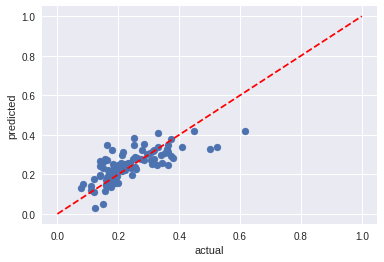

In [0]:
data = df[names]
target = df["SalePrice"]/np.max(df["SalePrice"])

train = data[:-100]
test = data[-100:]
 
lm = LinearRegression(normalize =True)
lm.fit(train,target[:-100])

plt.plot([0,1],[0,1],'r--')
plt.scatter(target[-100:],lm.predict(test))
plt.xlabel("actual")
plt.ylabel("predicted")
mean_squared_error(target[-100:],lm.predict(test))

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
data = df[names]
target = df["SalePrice"]/np.max(df["SalePrice"])

for a in data.columns:
    data["{}**2".format(a)]=data[a]**2
    data["{}**3".format(a)]=data[a]**3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


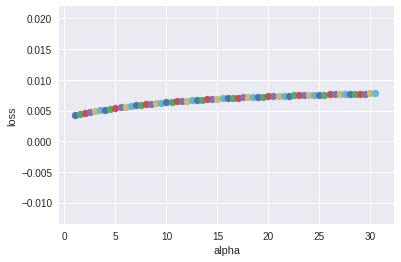

In [0]:



train = data[:-100]
test = data[-100:]


for i in range(10,310,5):
    lm = Ridge(alpha=i/10, normalize=True)
    lm.fit(train,target[:-100])


    plt.scatter(i/10,mean_squared_error(target[-100:],lm.predict(test)))
    plt.xlabel("alpha")
    plt.ylabel("loss")

In [0]:
looks like the lowest loss is achieved by the smallest alpha. about 1.5 is the best.